# PHZ Project
## Clustering and Unsupervised Machine Learning
### This script contains the following:
#### 1. Importing Libraries and Data
#### 2. Cleaning and Renaming Data
#### 3. Elbow Technique for determining K
#### 4. K-Means Clustering
#### 5. Mapping with Clusters
#### 6. Aggregation of Cluster Values
#### 7. Additional Mapping by Year
#### 8 Aggregations and Descriptive Stats for 2012 and 2022 data

## 1 Importing Libraries and Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [4]:
# This option ensures the graphs are displayed without the need to "call" them specifically.

%matplotlib inline

In [5]:
path = r"C:\Users\Noah\Achievement 6"

In [6]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Cleaned', 'df_corn_analysis.csv'))

In [7]:
df.shape

(5064, 15)

In [8]:
df.head(5)

,Unnamed: 0,Year,County,State,Zip code,latitude,longitude,Plant Hardiness Zone,Corn Acres Harvested,Sales ($),CV,State ANSI,Ag District,Ag District Code,Concatenated
0,0,2022,CREEK,OKLAHOMA,74010,35.83,-96.39,7b,244.0,71000,0.3,40,CENTRAL,50,CREEKOKLAHOMA2022
1,1,2022,GRADY,OKLAHOMA,73002,34.92,-97.77,7b,3063.0,2834000,0.3,40,CENTRAL,50,GRADYOKLAHOMA2022
2,2,2022,MCCLAIN,OKLAHOMA,73010,35.14,-97.65,7b,3167.0,1941000,0.3,40,CENTRAL,50,MCCLAINOKLAHOMA2022
3,3,2022,PAYNE,OKLAHOMA,74023,35.97,-96.76,7b,401.0,237000,0.3,40,CENTRAL,50,PAYNEOKLAHOMA2022
4,4,2022,MAJOR,OKLAHOMA,73718,36.24,-98.18,7a,4449.0,7794000,0.3,40,NORTH CENTRAL,40,MAJOROKLAHOMA2022


## 2 Cleaning and Renaming Data

In [10]:
# create a mapping function for converting Plant Hardiness Zone to number for correlation
def convert_alphanumeric(value):
    # Extract the numeric part and the letter part
    if pd.isna(value):
        return None  # Handle NaN values
    num_part = int(value[:-1])
    letter_part = value[-1].lower()
    
    # Create a mapping for letters
    letter_mapping = {'a': 0.1, 'b': 0.5}
    
    # Convert the value to a float
    return num_part + letter_mapping.get(letter_part, 0)

In [11]:
df['Plant Hardiness Zone'] = df['Plant Hardiness Zone'].apply(convert_alphanumeric)


In [319]:
df.head(10)

,Unnamed: 0,Year,County,State,Zip,Latitude,Longitude,PHZ,Corn Acres Harvested,Sales,CV,State ANSI,Ag District,Ag District Code,Concatenated
0,0,2022,CREEK,OKLAHOMA,74010,35.83,-96.39,7.5,244.0,71000,0.3,40,CENTRAL,50,CREEKOKLAHOMA2022
1,1,2022,GRADY,OKLAHOMA,73002,34.92,-97.77,7.5,3063.0,2834000,0.3,40,CENTRAL,50,GRADYOKLAHOMA2022
2,2,2022,MCCLAIN,OKLAHOMA,73010,35.14,-97.65,7.5,3167.0,1941000,0.3,40,CENTRAL,50,MCCLAINOKLAHOMA2022
3,3,2022,PAYNE,OKLAHOMA,74023,35.97,-96.76,7.5,401.0,237000,0.3,40,CENTRAL,50,PAYNEOKLAHOMA2022
4,4,2022,MAJOR,OKLAHOMA,73718,36.24,-98.18,7.1,4449.0,7794000,0.3,40,NORTH CENTRAL,40,MAJOROKLAHOMA2022
5,5,2022,ROGERS,OKLAHOMA,74015,36.18,-95.76,7.5,348.0,248000,0.3,40,NORTHEAST,70,ROGERSOKLAHOMA2022
6,6,2022,WAGONER,OKLAHOMA,74013,36.03,-95.78,7.5,3810.0,0,0.3,40,NORTHEAST,70,WAGONEROKLAHOMA2022
7,7,2022,TEXAS,OKLAHOMA,73901,36.75,-101.08,6.5,79748.0,105348000,0.3,40,PANHANDLE,10,TEXASOKLAHOMA2022
8,8,2022,CADDO,OKLAHOMA,73001,35.23,-98.40,7.5,4583.0,4838000,0.3,40,SOUTHWEST,30,CADDOOKLAHOMA2022
9,9,2022,KIOWA,OKLAHOMA,73041,35.07,-98.87,7.5,2793.0,1355000,0.3,40,SOUTHWEST,30,KIOWAOKLAHOMA2022


In [13]:
print(df.dtypes)

Unnamed: 0                int64
Year                      int64
County                   object
State                    object
Zip code                  int64
latitude                float64
longitude               float64
Plant Hardiness Zone    float64
Corn Acres Harvested    float64
Sales ($)                 int64
CV                      float64
State ANSI                int64
Ag District              object
Ag District Code          int64
Concatenated             object
dtype: object


In [14]:
# renaming columns
df.rename(columns = {'Zip code' : 'Zip', 'latitude' : 'Latitude', 'longitude' : 'Longitude', 'Sales ($)' : 'Sales', 'Plant Hardiness Zone' : 'PHZ'}, inplace = True)

In [15]:
df.head()

,Unnamed: 0,Year,County,State,Zip,Latitude,Longitude,PHZ,Corn Acres Harvested,Sales,CV,State ANSI,Ag District,Ag District Code,Concatenated
0,0,2022,CREEK,OKLAHOMA,74010,35.83,-96.39,7.5,244.0,71000,0.3,40,CENTRAL,50,CREEKOKLAHOMA2022
1,1,2022,GRADY,OKLAHOMA,73002,34.92,-97.77,7.5,3063.0,2834000,0.3,40,CENTRAL,50,GRADYOKLAHOMA2022
2,2,2022,MCCLAIN,OKLAHOMA,73010,35.14,-97.65,7.5,3167.0,1941000,0.3,40,CENTRAL,50,MCCLAINOKLAHOMA2022
3,3,2022,PAYNE,OKLAHOMA,74023,35.97,-96.76,7.5,401.0,237000,0.3,40,CENTRAL,50,PAYNEOKLAHOMA2022
4,4,2022,MAJOR,OKLAHOMA,73718,36.24,-98.18,7.1,4449.0,7794000,0.3,40,NORTH CENTRAL,40,MAJOROKLAHOMA2022


#### creating number only sets for clustering

In [17]:
df_no = df[['Year','Zip','Latitude','Longitude','PHZ','Corn Acres Harvested','Sales','CV','State ANSI','Ag District Code']]

## 3. Elbow Technique for determining K


In [20]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [21]:
score = [kmeans[i].fit(df_no).score(df_no) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\Noah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Noah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Noah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Noah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Noah\anaconda3\Lib\site-packages\sklearn\cluster\_k

[-1.3834377672807856e+19,
 -3.923827703504832e+18,
 -1.7076659201126449e+18,
 -1.0398061288516375e+18,
 -6.760971007495196e+17,
 -4.68260675638524e+17,
 -3.556300978102117e+17,
 -2.640290734906793e+17,
 -2.1326092998691213e+17]

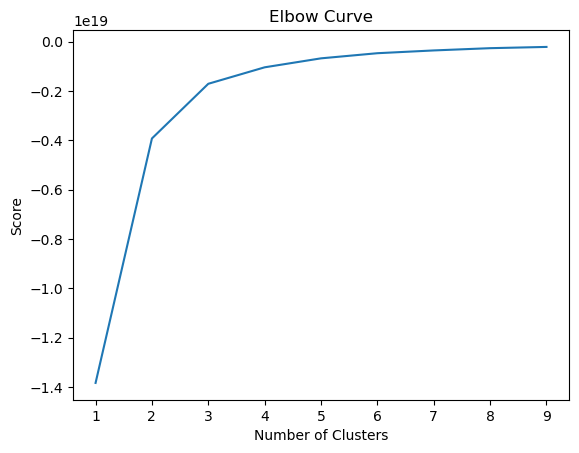

In [22]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### 3 clusters is the sweet spot

## 4. K-Means Clustering

In [25]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [26]:
# Fit the k-means object to the data.

kmeans.fit(df_no)

C:\Users\Noah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [27]:
df_no['clusters'] = kmeans.fit_predict(df_no)

C:\Users\Noah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Noah\AppData\Local\Temp\ipykernel_26560\1163622870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no['clusters'] = kmeans.fit_predict(df_no)


In [28]:
df_no.head()

,Year,Zip,Latitude,Longitude,PHZ,Corn Acres Harvested,Sales,CV,State ANSI,Ag District Code,clusters
0,2022,74010,35.83,-96.39,7.5,244.0,71000,0.3,40,50,0
1,2022,73002,34.92,-97.77,7.5,3063.0,2834000,0.3,40,50,0
2,2022,73010,35.14,-97.65,7.5,3167.0,1941000,0.3,40,50,0
3,2022,74023,35.97,-96.76,7.5,401.0,237000,0.3,40,50,0
4,2022,73718,36.24,-98.18,7.1,4449.0,7794000,0.3,40,40,0


In [29]:
df_no['clusters'].value_counts()

clusters
0    3981
2     809
1     274
Name: count, dtype: int64

In [248]:
df_no['clusters'].shape

(5064,)

All points accounted for, onto...

## 5. Mapping with Clusters


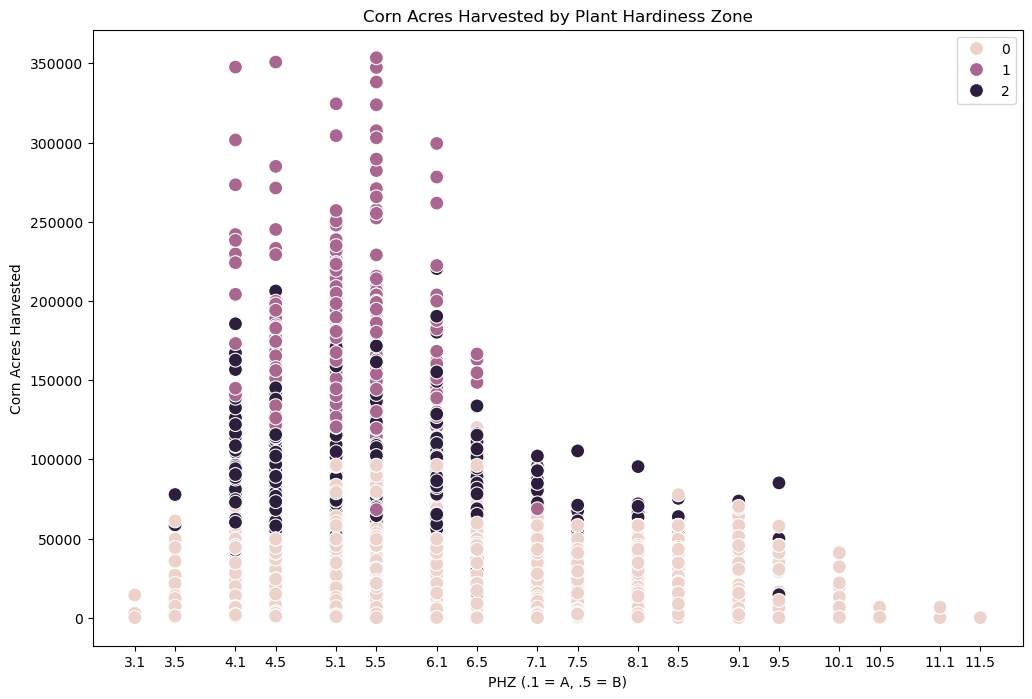

In [180]:
# Plot the clusters for the "PHZ" and "Corn Acres Harvested" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_no['PHZ'], y=df_no['Corn Acres Harvested'], hue=kmeans.labels_, s=100) 
# subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('PHZ (.1 = A, .5 = B)') # Label x-axis.
plt.ylabel('Corn Acres Harvested') # Label y-axis.
plt.title('Corn Acres Harvested by Plant Hardiness Zone') #give title

#plotting each tick 
unique_x_values = sorted(df_no['PHZ'].unique())
# Set x-ticks to be the unique values from the x-axis
plt.xticks(ticks=unique_x_values)
# marking each integer on x-axis
plt.gca().set_xticks(unique_x_values)
plt.gca().set_xticklabels([f'{tick:.1f}' for tick in unique_x_values])

# saving the plot
plt.savefig("Acres Harvested by PHZ clustered.png")

plt.show()

#### <<grouping here appears to be by quantity of acres harvested

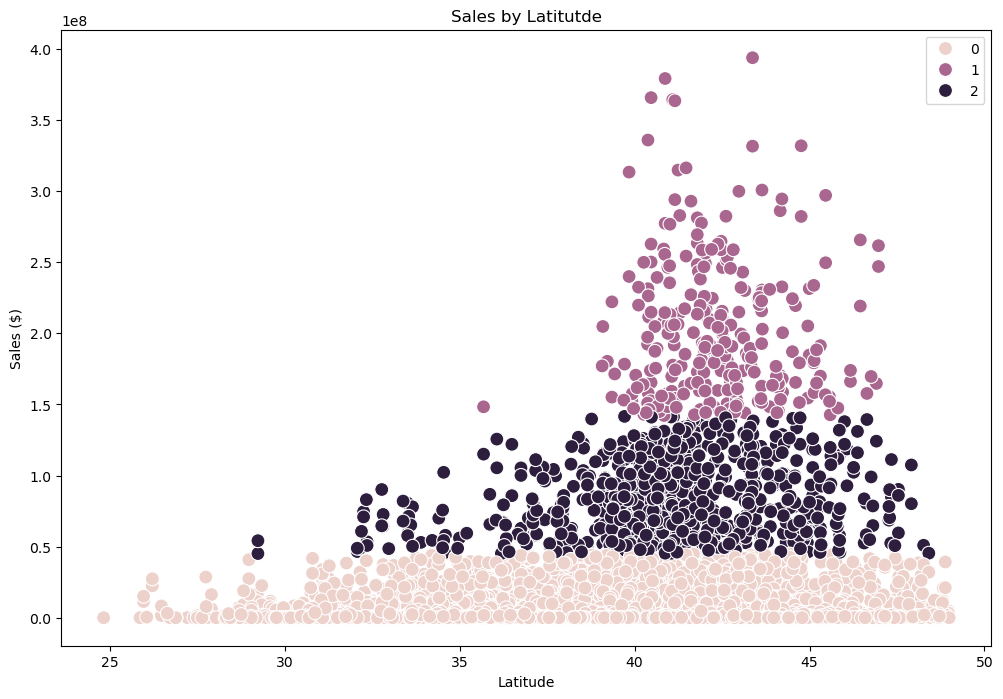

In [225]:
# Plot the clusters for the "Latitude" and "Sales" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_no['Latitude'], y=df_no['Sales'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Latitude') 
plt.ylabel('Sales ($)') 
plt.title('Sales by Latitutde') # give title

# saving the plot
plt.savefig("Sales by Lat all pts.png")

plt.show()

#### << The bulk of Corn Sales falls within  the 35th and 50th parallel. 
That is the southern border of Tennessee all the way north to the northern US border with Canada.
It is a fairly northerly crop existing in colder climates

## 6. Aggregation of Cluster Values


In [301]:
# adding titles to clusters
df_no.loc[df_no['clusters'] == 2, 'cluster'] = 'Medium Farms'
df_no.loc[df_no['clusters'] == 1, 'cluster'] = 'Large Farms'
df_no.loc[df_no['clusters'] == 0, 'cluster'] = 'Small Farms'

In [303]:
df_no.head(0)

,Year,Zip,Latitude,Longitude,PHZ,Corn Acres Harvested,Sales,CV,State ANSI,Ag District Code,clusters,cluster


In [305]:
df_no.groupby('cluster').agg({'PHZ':['mean', 'median'], 
                         'Corn Acres Harvested':['mean', 'median'], 
                         'Sales':['mean', 'median'],
                          'Latitude':['mean', 'median']})

PHZ        Corn Acres Harvested                   Sales  \
                  mean median                 mean    median          mean   
cluster                                                                      
Large Farms   5.187591    5.1        183242.510949  176295.5  2.016104e+08   
Medium Farms  5.752905    5.5         88314.290482   83060.0  8.185281e+07   
Small Farms   6.982040    7.1         14980.850884    5915.0  8.249660e+06   

                            Latitude          
                   median       mean  median  
cluster                                       
Large Farms   189831000.0  42.355328  42.125  
Medium Farms   77869000.0  41.082299  41.050  
Small Farms     2757000.0  37.608234  37.340

## 7. Additional Mapping by Year

In [40]:
# creating separate subsets for 2012 and 2022

df_no_2012=df_no[df_no['Year'] == 2012]
df_no_2022=df_no[df_no['Year'] == 2022]

df_no_12 = df_no_2012[['Year','Zip','Latitude','Longitude','PHZ','Corn Acres Harvested','Sales','CV','State ANSI','Ag District Code']]
df_no_22 = df_no_2022[['Year','Zip','Latitude','Longitude','PHZ','Corn Acres Harvested','Sales','CV','State ANSI','Ag District Code']]

### Creating 2012 clusters

In [42]:
num_c12 = range(1, 10) # Defines the range of potential clusters in the data.
kmeans12 = [KMeans(n_clusters=i) for i in num_c12] # Defines k-means clusters in the range assigned above.

In [43]:
score12 = [kmeans12[i].fit(df_no_12).score(df_no_12) for i in range(len(kmeans12))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\Noah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Noah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Noah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Noah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Noah\anaconda3\Lib\site-packages\sklearn\cluster\_k

[-1.3834377672807856e+19,
 -3.923827703504832e+18,
 -1.7076659201126449e+18,
 -1.0398061288516375e+18,
 -6.760971007495196e+17,
 -4.68260675638524e+17,
 -3.556300978102117e+17,
 -2.640290734906793e+17,
 -2.1326092998691213e+17]

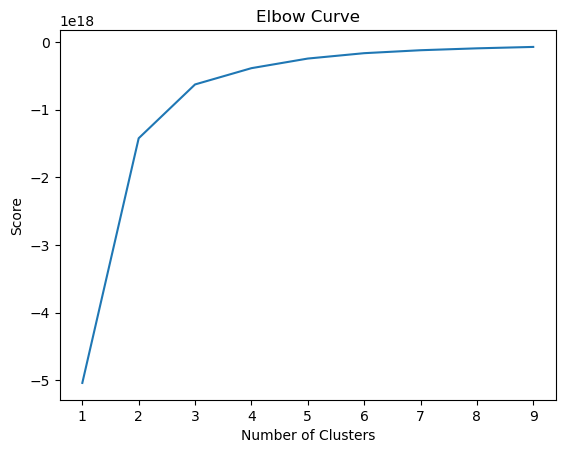

In [44]:
# Plot the elbow curve using PyLab.

pl.plot(num_c12,score12)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()


In [45]:
# Create the k-means object.

kmeans12 = KMeans(n_clusters = 3) 

In [46]:
# Fit the k-means object to the data.

kmeans12.fit(df_no_12)

C:\Users\Noah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [47]:
df_no_12['clusters'] = kmeans12.fit_predict(df_no_12)

C:\Users\Noah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Noah\AppData\Local\Temp\ipykernel_26560\2580127935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_12['clusters'] = kmeans12.fit_predict(df_no_12)


In [48]:
df_no_12.shape

(2296, 11)

In [49]:
df_no_12.head()

,Year,Zip,Latitude,Longitude,PHZ,Corn Acres Harvested,Sales,CV,State ANSI,Ag District Code,clusters
12,2012,88410,35.91,-103.15,6.5,9824.0,12110000,2.5,35,30,0
13,2012,87012,36.11,-106.66,6.1,130.0,64000,2.5,35,10,0
14,2012,87001,35.38,-106.47,7.5,17.0,0,2.5,35,10,0
15,2012,87010,35.37,-106.14,7.1,17.0,0,2.5,35,10,0
16,2012,87512,36.94,-105.45,5.5,16.0,1000,2.5,35,10,0


In [50]:
df_no_12['clusters'].value_counts()

clusters
0    1762
2     401
1     133
Name: count, dtype: int64

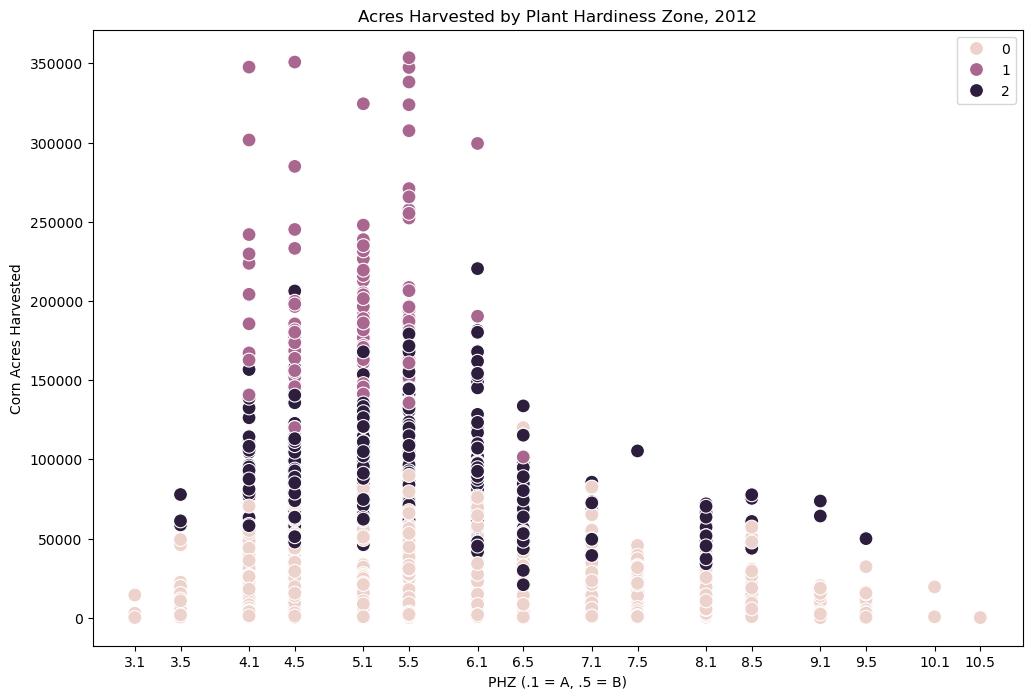

In [217]:
# Plot the clusters for the "PHZ" and "Corn Acres Harvested" variables for 2012.

plt.figure(figsize=(12,8))
ax12 = sns.scatterplot(x=df_no_12['PHZ'], y=df_no_12['Corn Acres Harvested'], hue=kmeans12.labels_, s=100) 
# subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see.

ax12.grid(False) # This removes the grid from the background.
plt.xlabel('PHZ (.1 = A, .5 = B)') # Label x-axis.
plt.ylabel('Corn Acres Harvested') # Label y-axis.
plt.title('Acres Harvested by Plant Hardiness Zone, 2012') # plot title

#plotting each tick on x axis 
unique_x_values12 = sorted(df_no_12['PHZ'].unique())
# Set x-ticks to be the unique values from the x-axis
plt.xticks(ticks=unique_x_values12)
# marking each integer on x-axis
plt.gca().set_xticks(unique_x_values12)
plt.gca().set_xticklabels([f'{tick:.1f}' for tick in unique_x_values12])

# saving the plot
plt.savefig("Acres by PHZ 2012.png")
plt.show()

### repeat process for 2022

In [189]:
num_c22 = range(1, 10) # Defines the range of potential clusters in the data.
kmeans22 = [KMeans(n_clusters=i) for i in num_c22] # Defines k-means clusters in the range assigned above.

In [191]:
score22 = [kmeans22[i].fit(df_no_22).score(df_no_22) for i in range(len(kmeans22))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\Noah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Noah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Noah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Noah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Noah\anaconda3\Lib\site-packages\sklearn\cluster\_k

[-1.3834377672807856e+19,
 -3.923827703504832e+18,
 -1.7076659201126449e+18,
 -1.0398061288516375e+18,
 -6.760971007495196e+17,
 -4.68260675638524e+17,
 -3.556300978102117e+17,
 -2.640290734906793e+17,
 -2.1326092998691213e+17]

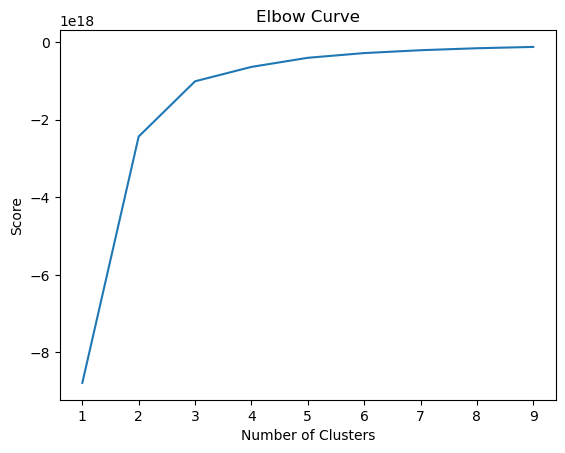

In [192]:
# Plot the elbow curve using PyLab.

pl.plot(num_c22,score22)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()


In [193]:
# Create the k-means object.

kmeans22 = KMeans(n_clusters = 3) 

In [194]:
kmeans22.fit(df_no_22)

C:\Users\Noah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [195]:
df_no_22['clusters'] = kmeans22.fit_predict(df_no_22)

C:\Users\Noah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Noah\AppData\Local\Temp\ipykernel_26560\1695668280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_22['clusters'] = kmeans22.fit_predict(df_no_22)


In [196]:
df_no_22.shape

(2768, 11)

In [197]:
df_no_22.head()

,Year,Zip,Latitude,Longitude,PHZ,Corn Acres Harvested,Sales,CV,State ANSI,Ag District Code,clusters
0,2022,74010,35.83,-96.39,7.5,244.0,71000,0.3,40,50,0
1,2022,73002,34.92,-97.77,7.5,3063.0,2834000,0.3,40,50,0
2,2022,73010,35.14,-97.65,7.5,3167.0,1941000,0.3,40,50,0
3,2022,74023,35.97,-96.76,7.5,401.0,237000,0.3,40,50,0
4,2022,73718,36.24,-98.18,7.1,4449.0,7794000,0.3,40,40,0


In [198]:
df_no_22['clusters'].value_counts()

clusters
0    2198
2     419
1     151
Name: count, dtype: int64

In [257]:
df_no_22['clusters'].shape

(2768,)

### Mapping with Clusters - 2012 and 2022

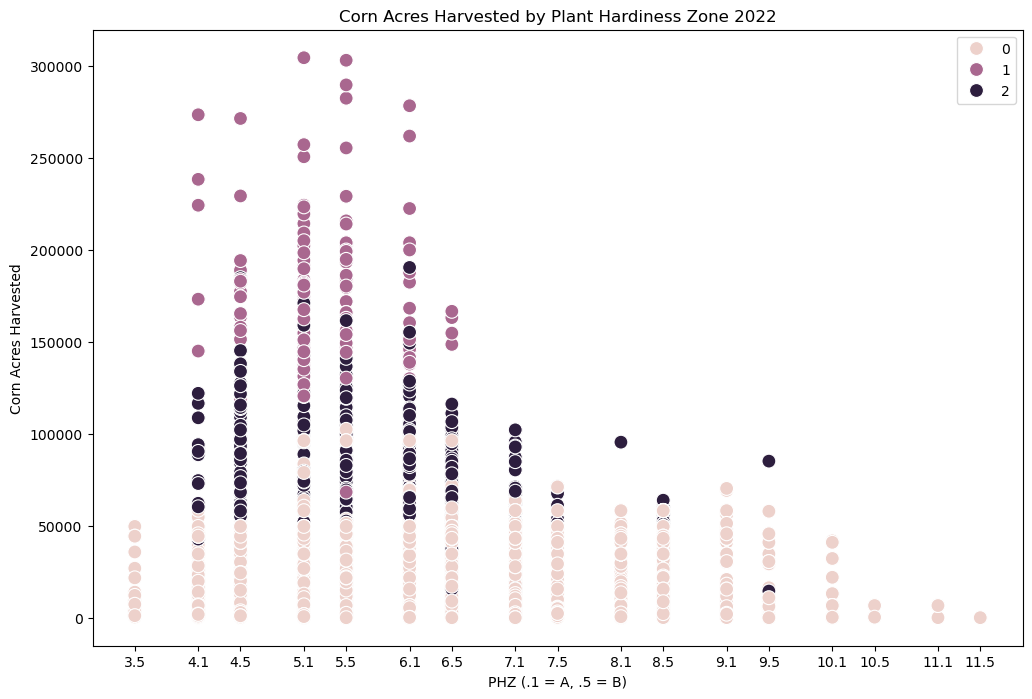

In [200]:
# Plot the clusters for the "PHZ" and "Corn Acres Harvested" variables.

plt.figure(figsize=(12,8))
ax22 = sns.scatterplot(x=df_no_22['PHZ'], y=df_no_22['Corn Acres Harvested'], hue=kmeans22.labels_, s=100) 
#subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see.

ax22.grid(False) # This removes the grid from the background.
plt.xlabel('PHZ (.1 = A, .5 = B)') # Label x-axis.
plt.ylabel('Corn Acres Harvested') # Label y-axis.
plt.title('Corn Acres Harvested by Plant Hardiness Zone 2022') #give title

#plotting each tick on 
unique_x_values22 = sorted(df_no_22['PHZ'].unique())
# Set x-ticks to be the unique values from the x-axis
plt.xticks(ticks=unique_x_values22)
# marking each integer on x-axis
plt.gca().set_xticks(unique_x_values22)
plt.gca().set_xticklabels([f'{tick:.1f}' for tick in unique_x_values22])

# saving the plot
plt.savefig("acres by PHZ 2022.png")
plt.show()

#### additional mapping for comparisons

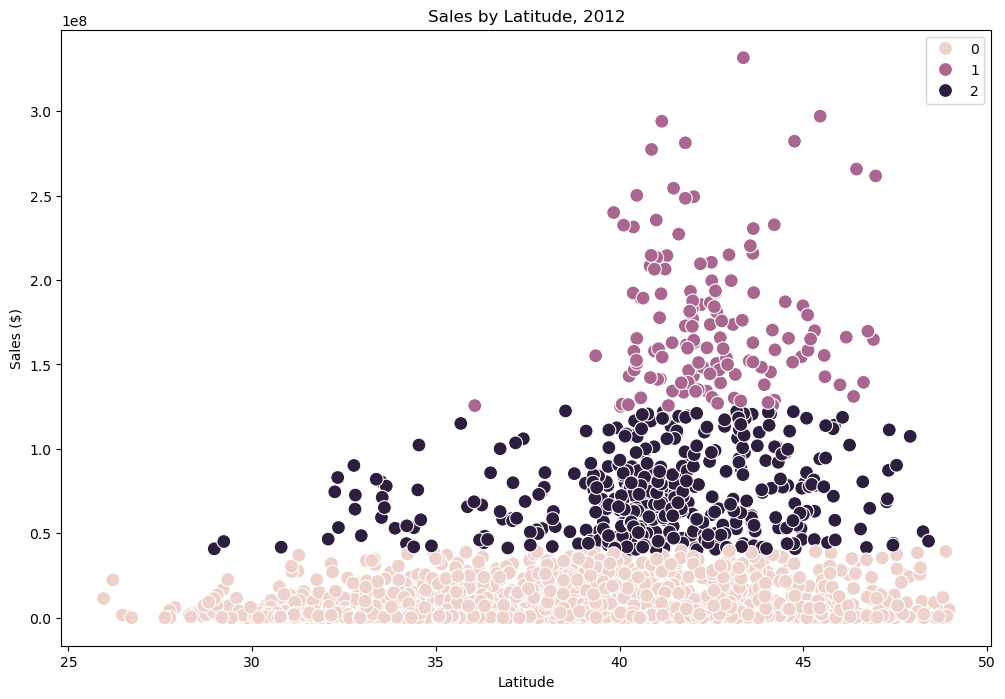

In [221]:
# Plot the clusters for Lat and Sales for 2012 and 2022

plt.figure(figsize=(12,8))
ax12 = sns.scatterplot(x=df_no_12['Latitude'], y=df_no_12['Sales'], hue=kmeans12.labels_, s=100)

ax12.grid(False) 
plt.xlabel('Latitude') 
plt.ylabel('Sales ($)') 
plt.title('Sales by Latitude, 2012')

# saving the plot
plt.savefig("Lat to Sales 2012.png")

plt.show()

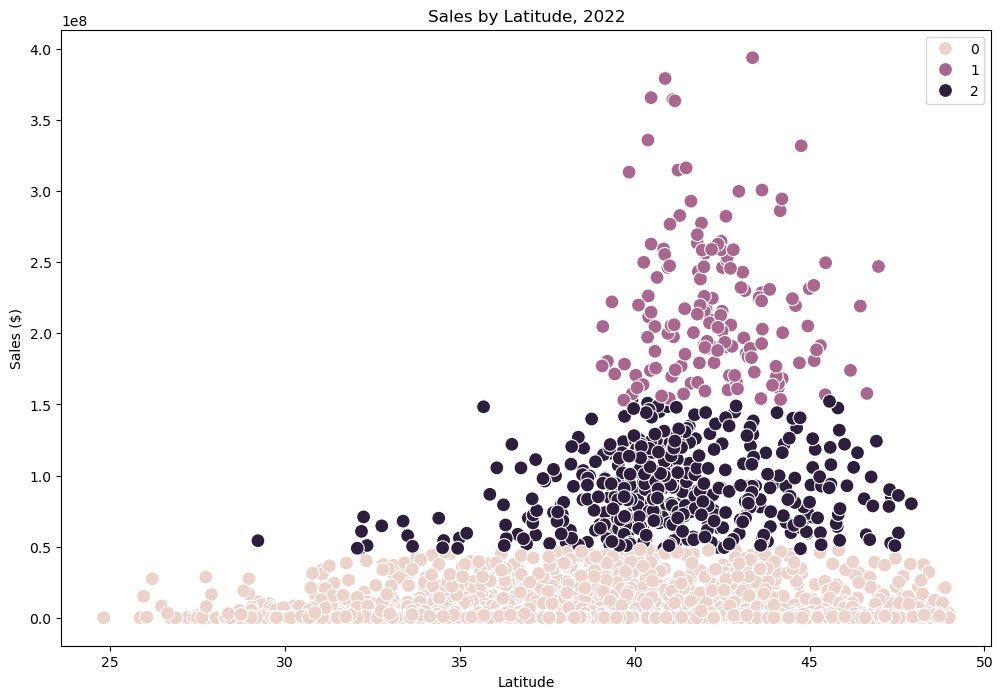

In [223]:
# Plot the clusters for Lat and Sales for 2012 and 2022

plt.figure(figsize=(12,8))
ax22 = sns.scatterplot(x=df_no_22['Latitude'], y=df_no_22['Sales'], hue=kmeans22.labels_, s=100)

ax22.grid(False) 
plt.xlabel('Latitude') 
plt.ylabel('Sales ($)') 
plt.title('Sales by Latitude, 2022')

# saving the plot
plt.savefig("Lat to Sales 2022.png")

plt.show()

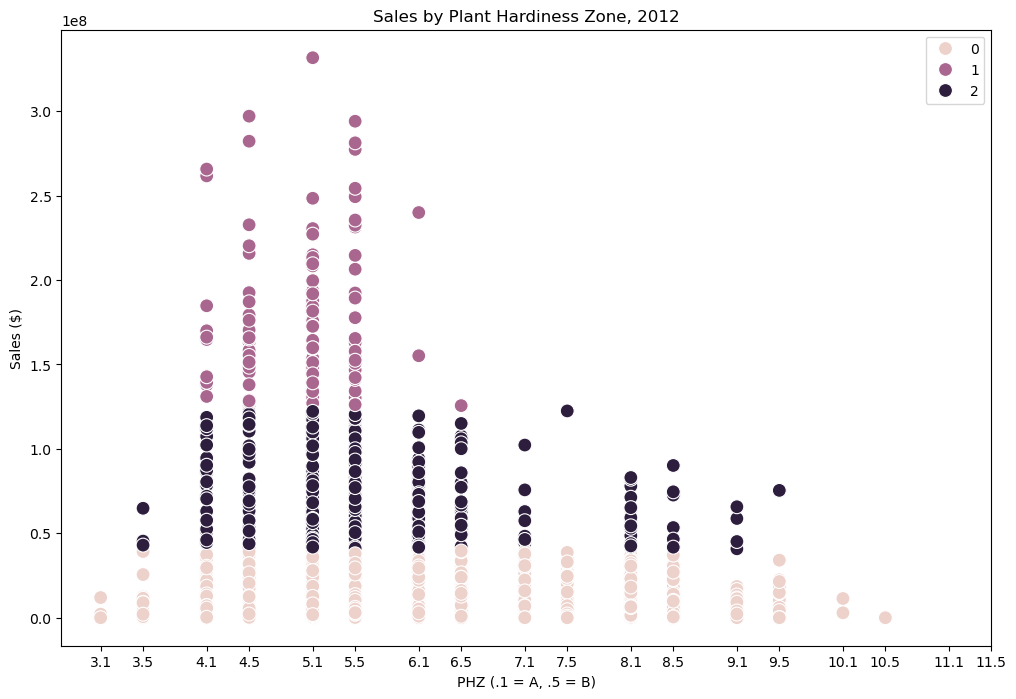

In [239]:
# Plot the clusters for the Sales and the PHZ.

plt.figure(figsize=(12,8))
ax12 = sns.scatterplot(x=df_no_12['PHZ'], y=df_no_12['Sales'], hue=kmeans12.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax12.grid(False) # This removes the grid from the background.
plt.xlabel('PHZ (.1 = A, .5 = B)') # Label x-axis.
plt.ylabel('Sales ($)') # Label y-axis.
plt.title('Sales by Plant Hardiness Zone, 2012') # plot title

#plotting each tick on 
unique_x_values = sorted(df_no['PHZ'].unique())
# Set x-ticks to be the unique values from the x-axis from 2012 - that way the grapsh line up and can be compared visually
plt.xticks(ticks=unique_x_values)
# marking each integer on x-axis
plt.gca().set_xticks(unique_x_values)
plt.gca().set_xticklabels([f'{tick:.1f}' for tick in unique_x_values])

# saving the plot
plt.savefig("Sales by PHZ 2012.png")
plt.show()

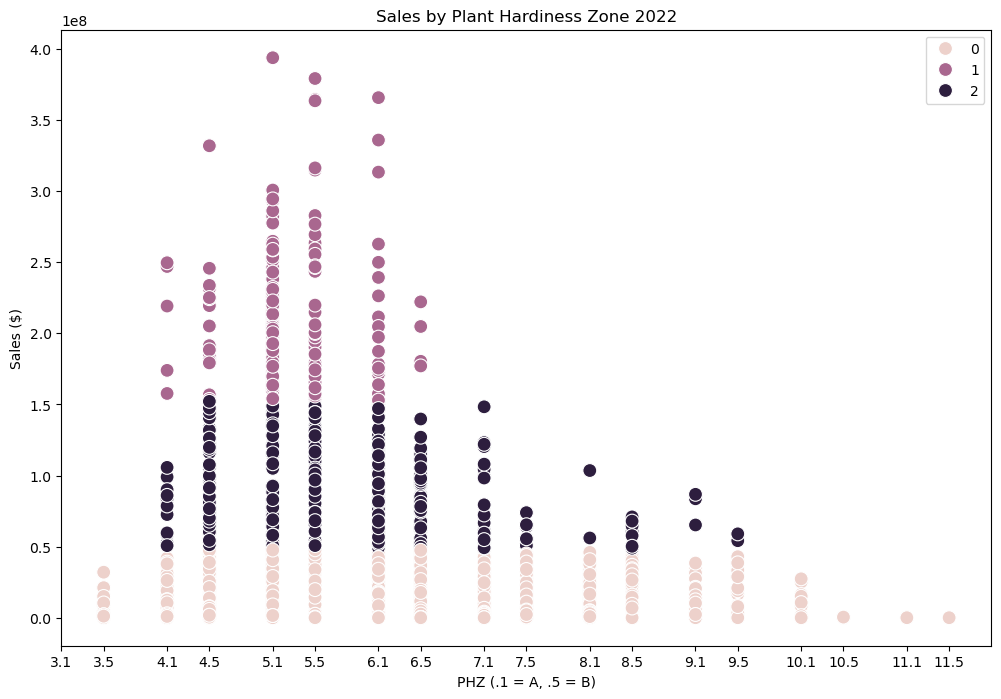

In [246]:
# Plot the clusters for the PHZ and Sales.

plt.figure(figsize=(12,8))
ax22 = sns.scatterplot(x=df_no_22['PHZ'], y=df_no_22['Sales'], hue=kmeans22.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax22.grid(False) # This removes the grid from the background.
plt.xlabel('PHZ (.1 = A, .5 = B)') # Label x-axis.
plt.ylabel('Sales ($)') # Label y-axis.
plt.title('Sales by Plant Hardiness Zone 2022') #give title

#plotting each tick on 
unique_x_values = sorted(df_no['PHZ'].unique())
# Set x-ticks to be the unique values from the x-axis from 2012 - that way the grapsh line up and can be compared visually
plt.xticks(ticks=unique_x_values)
# marking each integer on x-axis
plt.gca().set_xticks(unique_x_values)
plt.gca().set_xticklabels([f'{tick:.1f}' for tick in unique_x_values])

# saving the plot
plt.savefig("Sales by PHZ 2022.png")
plt.show()

### here is an interesting dewvelopment - it appears that over the ten year span, the sales for zone 6A (6.1) sspiked dramatically. 
#### We know that PHZ shifted north so the farms that exist geographically in the same area are still producing despite climate change
### this indicates that the change in PHZ was not an effective deterrent against corn growth
### what is the actual point at which corn becomes a poor crop? 
### how are farmers keeping their yields high despite changing climates?


## 8 Aggregations and Descriptive Stats for 2012 and 2022 data

In [268]:
# adding titles to clusters 12
df_no_12.loc[df_no_12['clusters'] == 2, 'cluster12'] = 'Medium Farms'
df_no_12.loc[df_no_12['clusters'] == 1, 'cluster12'] = 'Large Farms'
df_no_12.loc[df_no_12['clusters'] == 0, 'cluster12'] = 'Small Farms'

# adding titles to clusters 22
df_no_22.loc[df_no_22['clusters'] == 2, 'cluster22'] = 'Medium Farms'
df_no_22.loc[df_no_22['clusters'] == 1, 'cluster22'] = 'Large Farms'
df_no_22.loc[df_no_22['clusters'] == 0, 'cluster22'] = 'Small Farms'

In [270]:
df_no_12.groupby('cluster12').agg({'PHZ':['mean', 'median'], 
                         'Corn Acres Harvested':['mean', 'median'], 
                         'Sales':['mean', 'median'],
                          'Latitude':['mean', 'median']})

PHZ        Corn Acres Harvested                   Sales  \
                  mean median                 mean    median          mean   
cluster12                                                                    
Large Farms   5.024812    5.1        196063.458647  187017.0  1.764307e+08   
Medium Farms  5.654613    5.5         92338.650873   89461.0  7.208027e+07   
Small Farms   6.755846    6.5         13517.569807    4780.0  8.030965e+06   

                            Latitude         
                   median       mean median  
cluster12                                    
Large Farms   164751000.0  42.542481  42.27  
Medium Farms   68091000.0  41.057332  41.11  
Small Farms     3316500.0  37.709557  37.60

In [274]:
df_no_22.groupby('cluster22').agg({'PHZ':['mean', 'median'], 
                         'Corn Acres Harvested':['mean', 'median'], 
                         'Sales':['mean', 'median'],
                          'Latitude':['mean', 'median']})

PHZ        Corn Acres Harvested                 \
                  mean median                 mean         median   
cluster22                                                           
Large Farms   5.272185    5.1        175058.264901  167428.000000   
Medium Farms  5.884248    6.1         80117.379475   78188.000000   
Small Farms   7.174613    7.1         15636.168958    6594.041237   

                     Sales                Latitude         
                      mean       median       mean median  
cluster22                                                  
Large Farms   2.175271e+08  205407000.0  42.288675  42.11  
Medium Farms  8.837850e+07   83618000.0  41.059284  40.98  
Small Farms   8.145985e+06    2160000.0  37.490223  37.17

In [276]:
df_no_12['clusters'].value_counts()

clusters
0    1762
2     401
1     133
Name: count, dtype: int64

In [278]:
df_no_22['clusters'].value_counts()

clusters
0    2198
2     419
1     151
Name: count, dtype: int64

### significant majority of farms are small... who contributes the most?

In [315]:
# how much is produced by each cluster?

# 2012 - number of farms * average acres harvested

small_farm_output12 = 1762*13517.569807
mid_farm_output12 = 401*92338.650873
large_farm_output12= 133*196063.458647
output_summary12 = (f"Small Farm output12: {small_farm_output12:.0f}\n"
                  f"Medium Farm output12: {mid_farm_output12:.0f}\n"
                  f"Large Farm output12: {large_farm_output12:.0f}")

small_farm_output22 = 2198*15636.168958	
mid_farm_output22 = 419*80117.379475
large_farm_output22= 151*175058.264901
output_summary22 = (f"Small Farm output22: {small_farm_output22:.0f}\n"
                  f"Medium Farm output22: {mid_farm_output22:.0f}\n"
                  f"Large Farm output22: {large_farm_output22:.0f}")
print(output_summary12)
print()
print(output_summary22)

Small Farm output12: 23817958
Medium Farm output12: 37027799
Large Farm output12: 26076440

Small Farm output22: 34368299
Medium Farm output22: 33569182
Large Farm output22: 26433798


### !!!
### In 2012, medium farms were the largest contributors, small and medium farms made up a smiliar size chunk of production
### In 2022, small farms are the largest producers, jumping 11 million acres in a decade!!
#### this is due to an increase in size of the farms (up about 2K acres on average) and the quantity (about 400 more farms reporting)
### Medium sized farms dropped off about 3 million acres and large farms hardly increased production

### Cursory research shows that the overall number of farms is decreasing and farms are increasing in size... could there be an error in the data?
#### Corn tends to be a mono culture crop and as such is more present on large farms. 
#### Additionally, the sizes posed in this data versus what is considered a small farm in the general population is not the same - 
Small farms are typically way smaller than what we are considering a small farm.
(<350K gross sales, large farms having over 1M gross sales) 
#### Our farms data is mostly comprised of massive farms. 
The "small farms" in our data set average $2 million in sales. 


### That being said, we need to ensure the data we are using is not biased.
#### Larger farms are more likely to report or be a part of the census, as they have more presence in market economy and take up more land.
####  Perhaps smaller farms reported less in 2012 due to surveying restraints? Hence an increase in reports in 2022 as technology improved 